In [1]:
#importing the library
import numpy as np  # For array manipulation
import pandas as pd # For dataframes
import seaborn as sn
import  matplotlib.pyplot as plt
# for model selection
from sklearn.model_selection import train_test_split, GridSearchCV 

# The sklearn library for preprocessing our data
from sklearn import preprocessing

# The models we will be using
from sklearn.ensemble import RandomForestClassifier #, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# metrics for evaluating model performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, roc_curve, roc_auc_score


#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
#loading the dataset
dataset_url = r'C:Wine.csv'
data = pd.read_csv(dataset_url)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
#analysing the datatype
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

## Exploratory Data Analysis

In [4]:
data.drop('Id',axis=1)
target = data.quality # The targets column 
X = data.drop(['quality','Id'],axis=1) # features(independent variable)

print('\nOur data has %d observations and %d features\n' %(X.shape[0], X.shape[1]))

#columns with missing data
print('Are there missing observations the columns?\n', (data.isnull().any()))

print('\nThere are', target.nunique(), 'Unique values for quality, namely:', sorted(target.unique())) 



Our data has 1143 observations and 11 features

Are there missing observations the columns?
 fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
Id                      False
dtype: bool

There are 6 Unique values for quality, namely: [3, 4, 5, 6, 7, 8]


# visualise  

How many wines of each quality are in the dataset?

In [534]:
gq = data[target>6]  #good quality
aq = data[(target>=5) & (target<=6)]  #average quality
bq = data[target<6]   #bad quality

print('%.2f %% of the wines are of good quality quality' %(100*len(gq)/len(target)))
print('%.2f %% of the wines are of average quality' %(100*len(aq)/len(target)))
print('%.2f %% of the wines are below average quality' %(100*len(bq)/len(target)))

13.91 % of the wines are of good quality quality
82.68 % of the wines are of average quality
45.67 % of the wines are below average quality


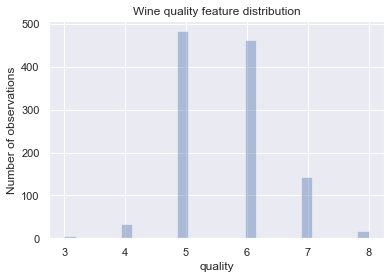

In [405]:
sn.distplot(target, norm_hist=False, kde=False)
plt.title('Wine quality feature distribution')
plt.ylabel('Number of observations')
plt.show()

<AxesSubplot:title={'center':'Wine quality feature distribution'}, xlabel='quality', ylabel='count'>

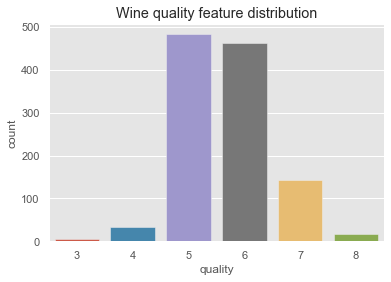

In [406]:
from matplotlib import style
style.use('ggplot')
plt.title('Wine quality feature distribution')
plt.ylabel('Number of observations')
sn.countplot(data['quality'])

In [4]:
df = X.copy() # copy of the orginal data

df['best_quality'] = 0  # All with excellent quality
df['best_quality'][target<6] = 1  # All with average quality

df.head()




C:\Users\Gokul Vinod\AppData\Local\Temp\ipykernel_20568\3458512777.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['best_quality'][target<6] = 1  # All with average quality


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,best_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [546]:
df['best_quality'].value_counts()

0    621
1    522
Name: best_quality, dtype: int64

<AxesSubplot:xlabel='best_quality', ylabel='count'>

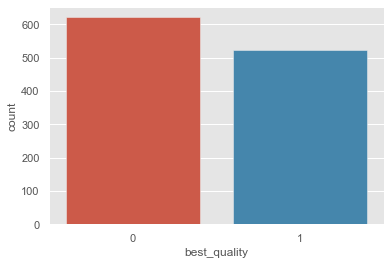

In [527]:
from matplotlib import style
style.use('ggplot')
sn.countplot(df['best_quality'])

In [509]:
df['best_quality'].value_counts()

0    621
1    522
Name: best_quality, dtype: int64

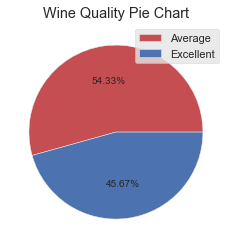

In [510]:
plt.pie(df.best_quality.value_counts(), autopct='%1.2f%%', colors=['r', 'b'])
plt.legend(labels=['Average', 'Excellent'], loc='best')
plt.title('Wine Quality Pie Chart')
plt.show()

In [563]:
df.to_csv("new_data_wine.csv")

In [7]:
# The targets are now composed of 2 classes (excellent and not excellent)
y = df.best_quality 
# Let's drop the targets column from the features dataframe
df = df.drop(['best_quality'], axis=1) 

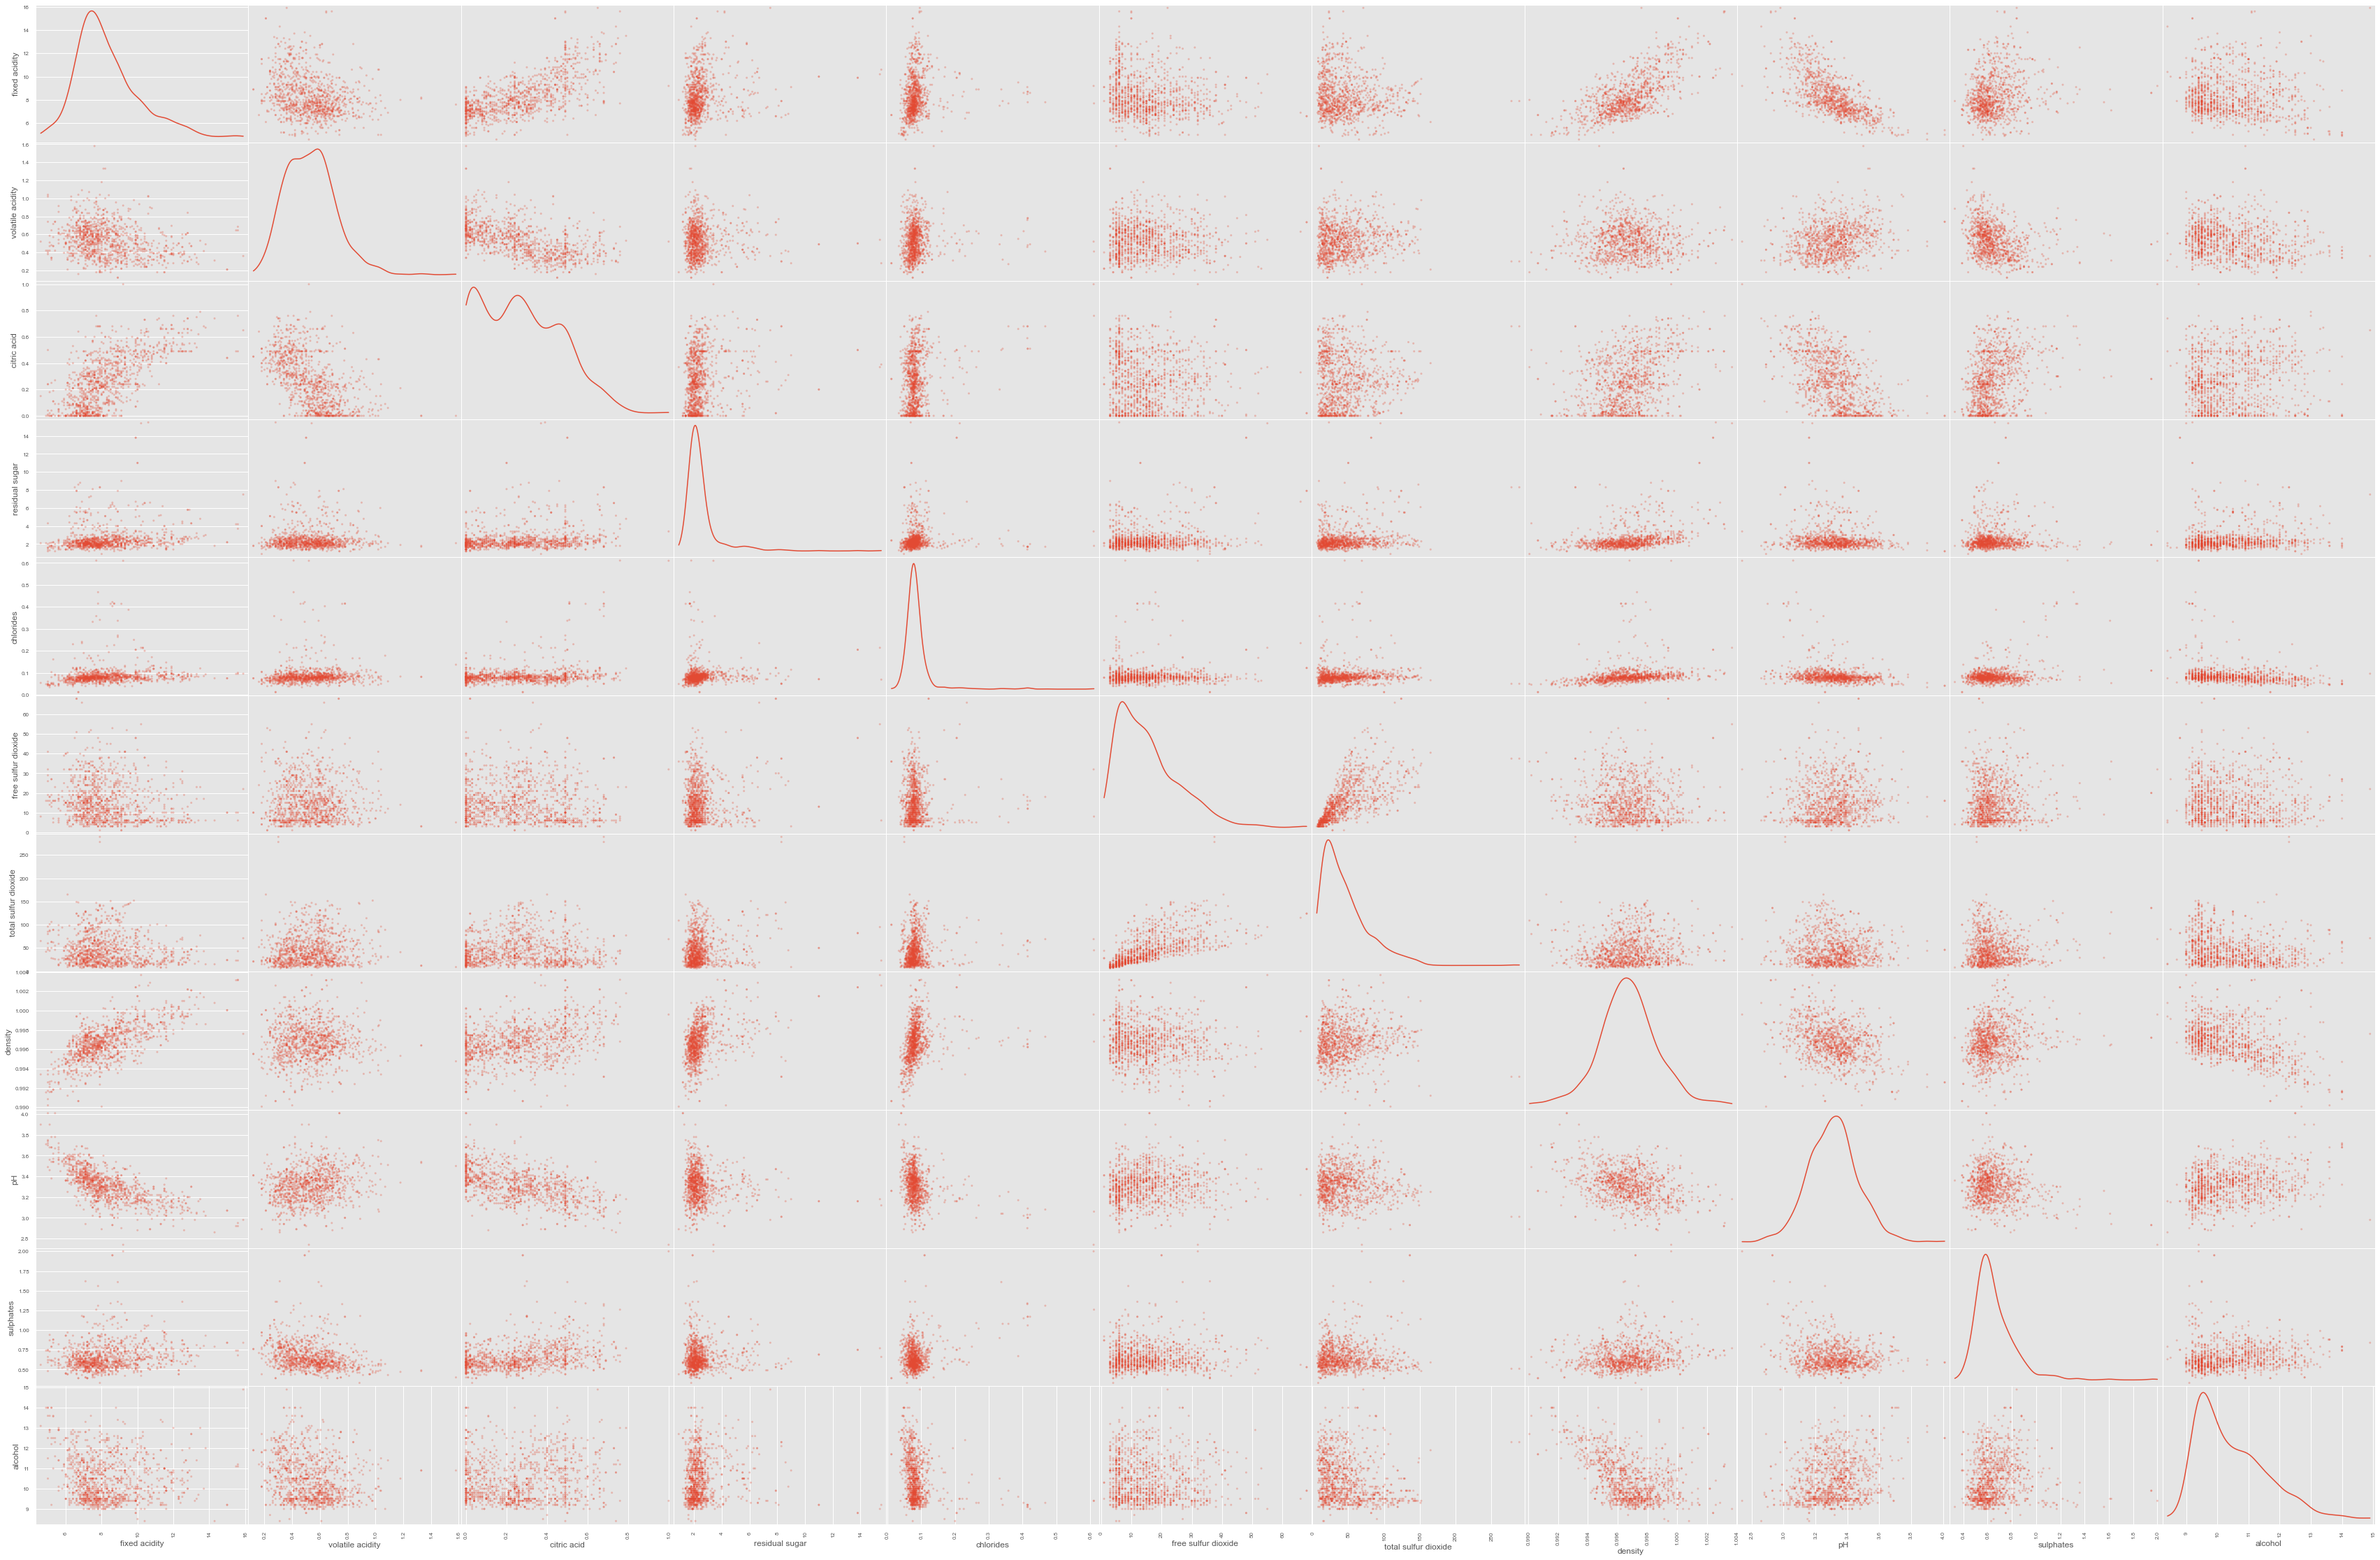

In [48]:
pd.plotting.scatter_matrix(df, alpha = 0.3, figsize = (60,40), diagonal = 'kde');


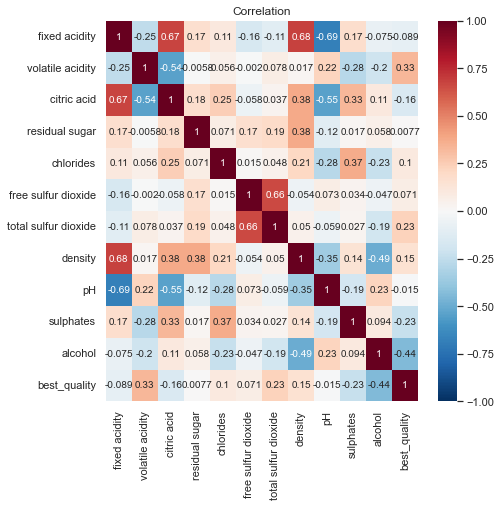

In [5]:
correlation = df.corr()
plt.figure(figsize=(7,7))
plt.title('Correlation')
sn.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.show()


# Preprocessing

We start by splitting the data into training and test sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3,
                                                   random_state=0, stratify=y)

# Do we have any categorical variables in our features?
cat = [cname for cname in df.columns if df[cname].dtype=='object']
print('There are %d columns with categorical entries\n' %len(cat))



There are 0 columns with categorical entries



C:\Users\Gokul Vinod\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='best_quality', ylabel='count'>

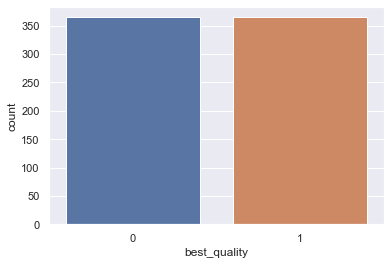

In [9]:
from imblearn.under_sampling import RandomUnderSampler
resampler = RandomUnderSampler()
X_train,y_train = resampler.fit_resample(X_train,y_train)

sn.countplot(y_train)

In [10]:
#fitting and testing
rf =  RandomForestClassifier()
rf.fit(X_train,y_train) 
rf_pred=rf.predict(X_test)

In [540]:
rf_accuracy =  accuracy_score(rf_pred,y_test)
print("rf_accuracy:{:.2f}%".format(rf_accuracy))

rf_accuracy:0.80%


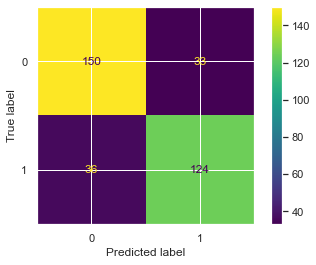

In [541]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(rf_pred,y_test,labels=rf.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = rf.classes_)
display.plot()

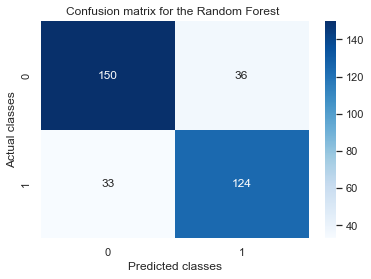

Random Forest:
 [[150  33]
 [ 36 124]]


In [542]:
ax = plt.subplot()
sn.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
ax.set_xlabel('Predicted classes')
ax.set_ylabel('Actual classes')
plt.title('Confusion matrix for the Random Forest ')
plt.show()

print('Random Forest:\n',confusion_matrix(rf_pred,y_test))

In [543]:
print(classification_report(rf_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       183
           1       0.79      0.78      0.78       160

    accuracy                           0.80       343
   macro avg       0.80      0.80      0.80       343
weighted avg       0.80      0.80      0.80       343



In [544]:
cm = confusion_matrix(rf_pred,y_test)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
#display.plot()
plt.show()
print("TN:",cm[0][0])
print("FN:",cm[1][0])
print("TP:",cm[1][1])
print("FP:",cm[0][1])

TN: 150
FN: 36
TP: 124
FP: 33


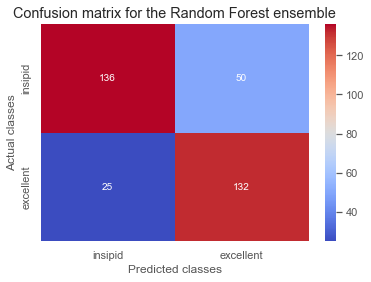

In [521]:
ax = plt.subplot()
sn.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='coolwarm')
ax.set_xlabel('Predicted classes')
ax.set_ylabel('Actual classes')
ax.xaxis.set_ticklabels(['insipid', 'excellent'])
ax.yaxis.set_ticklabels(['insipid', 'excellent'])
plt.title('Confusion matrix for the Random Forest ensemble')
plt.show()

# neural network

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import  seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

In [5]:
data = pd.read_csv("new_data_wine.csv")
data.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,best_quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [6]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,best_quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,0
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0


In [20]:
data['best_quality'].value_counts()

0    621
1    522
Name: best_quality, dtype: int64

In [21]:

X = data.iloc[:,:11].values
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.2  ,  0.6  ,  0.08 , ...,  3.45 ,  0.58 , 10.5  ],
       [ 5.9  ,  0.55 ,  0.1  , ...,  3.52 ,  0.76 , 11.2  ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ]])

In [22]:
y = data.iloc[:,-1].values
y

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3,stratify=y ,random_state=0)

<AxesSubplot:ylabel='count'>

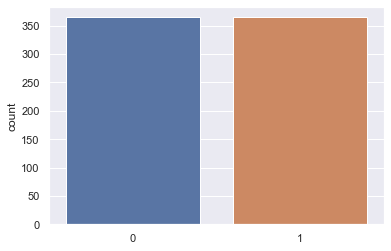

In [24]:
from imblearn.under_sampling import RandomUnderSampler
resampler = RandomUnderSampler()
X_train,y_train = resampler.fit_resample(X_train,y_train)

sn.countplot(y_train)

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [27]:
model = Sequential()
model.add(Dense(80, input_shape=(X_train.shape[1], ), activation="relu"))
model.add(Dense(40, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
history = model.fit(X_train, y_train, epochs=50 ,batch_size=8,class_weight={0:6,1:5},verbose=0)

In [30]:
y_pred = model.predict(X_test)
filter_arr = lambda x : 0 if x <= 0.5 else 1
y_pred = np.array([filter_arr(x) for x in y_pred])
y_pred

11/11 [==============================] - 0s 1ms/step


array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,

In [31]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print('Accuracy :%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix :')
print(cm,'\n\n')
print('-----------------------------')
result=metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)

Accuracy :0.75


Confusion Matrix :
[[134  52]
 [ 34 123]] 


-----------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       186
           1       0.70      0.78      0.74       157

    accuracy                           0.75       343
   macro avg       0.75      0.75      0.75       343
weighted avg       0.75      0.75      0.75       343



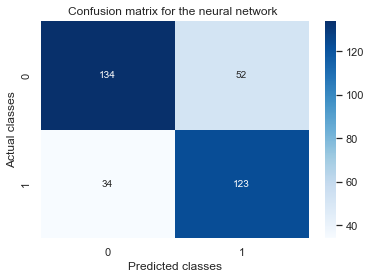

neural network:
 [[134  52]
 [ 34 123]]


In [36]:
ax = plt.subplot()
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
ax.set_xlabel('Predicted classes')
ax.set_ylabel('Actual classes')
plt.title('Confusion matrix for the neural network ')
plt.show()

print('neural network:\n',confusion_matrix(y_test,y_pred))